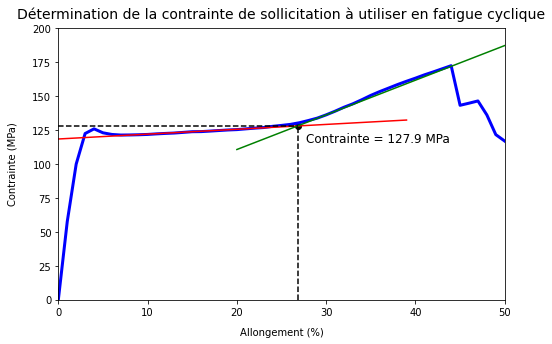

In [3]:
# -*- coding: utf-8 -*-


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FICHIER = 'C:/Users/lacombea/Desktop/34-66 deco 1 appli MEA.txt'


"""_________________________________________DONNEES A MODIFIER MANUELLEMENT SI BESOIN_________________________________________"""
"""positions x où les tangentes sont calculées""" 
centre_plast = 15
intervalle_plast = 4
centre_post = 30
intervalle_post = 2
"""___________________________________________________________________________________________________________________________"""

"""récupère les données du txt choisi"""
data = pd.read_csv(FICHIER, sep="\t", index_col=0, skiprows=2)  

"""calcul des tangentes plastiques et post-plastiques"""
a_plast = (data.loc[centre_plast + intervalle_plast / 2,"Y"] - data.loc[centre_plast - intervalle_plast / 2,"Y"]) / intervalle_plast
b_plast = data.loc[centre_plast,"Y"] - a_plast * centre_plast
a_post = (data.loc[centre_post + intervalle_post / 2,"Y"] - data.loc[centre_post - intervalle_post / 2,"Y"]) / intervalle_post
b_post = data.loc[centre_post,"Y"] - a_post * centre_post
tangentes = {"plastique":lambda x : a_plast * x + b_plast, "post-plastique":lambda x : a_post * x + b_post}

"""création et paramètres de la zone de graphique"""
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
plt.title('Détermination de la contrainte de sollicitation à utiliser en fatigue cyclique', fontsize=14, pad=10)
ax.set(xlim=(0, 50), ylim=(0, np.ceil(data['Y'].max() / 100) * 100))
ax.set_xlabel('Allongement (%)', labelpad=10)
ax.set_ylabel('Contrainte (MPa)', labelpad=15)

"""tracé de la courbe de traction et des deux tangentes"""
plt.plot(data.loc[0:70], color='b', linewidth=3)
plt.plot(range(0,40), [tangentes['plastique'](x) for x in range(0,40)], color='r')
plt.plot(range(20,55), [tangentes['post-plastique'](x) for x in range(20,55)], color='g')

"""calcul du point d'intersection des tangentes et affichage du point avec la valeur de contrainte"""
xi = (b_plast - b_post) / (a_post - a_plast)
yi = tangentes['plastique'](xi)
plt.text(xi + 1, yi - 12, f"Contrainte = {round(yi,1)} MPa", fontsize=12)
plt.plot(np.linspace(0, xi, 30), np.repeat(yi, 30), color='k', linestyle='dashed')
plt.plot(np.repeat(xi, 30), np.linspace(0, yi, 30), color='k', linestyle='dashed')
plt.scatter(xi, yi, color='k');

plt.show()